# Model Clustering Segmentasi Pelanggan Pada Data Bank Transaction

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memuat dataset

In [2]:
df = pd.read_csv("data/bank_transactions_data_edited.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
df2 = df.copy()

#### Melihat informasi dataset
- type data pada kolom TransactionDate dan PreviousTransactioDate berupa object (harus diubah menjadi datetime)
- terdapat data yang kosong

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

#### Melihat analisis deskriptih pada variabel numeric

In [5]:
df2.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


#### Melihat total jumlah data yang kosong pada setiap kolom

In [6]:
df2.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

#### Melihat total data duplikat setiap kolom

In [7]:
duplikat = df2.duplicated().sum()
print('data duplikat : ', duplikat)

data duplikat :  21


#### Mengubah tipe data 'TransactionDate' dan 'PreviousTransactionDate' ke datetime

In [8]:

df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'])
df2['PreviousTransactionDate'] = pd.to_datetime(df2['PreviousTransactionDate'])

print(df2.dtypes)


TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                       float64
CustomerOccupation                 object
TransactionDuration               float64
LoginAttempts                     float64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


#### Mengganti ilai yang hilang dengan median, mode, dan forward fill

In [9]:
# Mengganti nilai yang hilang untuk kolom numerik dengan median
df2['TransactionAmount'] = df2['TransactionAmount'].fillna(df2['TransactionAmount'].median())
df2['TransactionDuration'] = df2['TransactionDuration'].fillna(df2['TransactionDuration'].median())
df2['LoginAttempts'] = df2['LoginAttempts'].fillna(df2['LoginAttempts'].median())
df2['AccountBalance'] = df2['AccountBalance'].fillna(df2['AccountBalance'].median())
df2['CustomerAge'] = df2['CustomerAge'].fillna(df2['CustomerAge'].median())

# Mengganti nilai yang hilang untuk kolom kategorikal dengan mode (nilai paling sering)
df2['TransactionType'] = df2['TransactionType'].fillna(df2['TransactionType'].mode()[0])
df2['Location'] = df2['Location'].fillna(df2['Location'].mode()[0])
df2['DeviceID'] = df2['DeviceID'].fillna(df2['DeviceID'].mode()[0])
df2['IP Address'] = df2['IP Address'].fillna(df2['IP Address'].mode()[0])
df2['MerchantID'] = df2['MerchantID'].fillna(df2['MerchantID'].mode()[0])
df2['Channel'] = df2['Channel'].fillna(df2['Channel'].mode()[0])
df2['CustomerOccupation'] = df2['CustomerOccupation'].fillna(df2['CustomerOccupation'].mode()[0])

# Mengganti nilai yang hilang untuk kolom tanggal dengan forward fill
df2['TransactionDate'] = df2['TransactionDate'].fillna(method='ffill')
df2['PreviousTransactionDate'] = df2['PreviousTransactionDate'].fillna(method='ffill')

# Memeriksa hasil pengisian nilai hilang
print(df2.isnull().sum())


TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate     0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13420\1333065454.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['TransactionDate'] = df2['TransactionDate'].fillna(method='ffill')
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\1333065454.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['PreviousTransactionDate'] = df2['PreviousTransactionDate'].fillna(method='ffill')


In [10]:
df2['TransactionID'] = df2['TransactionID'].fillna(df2['TransactionID'].mode()[0])
df2['AccountID'] = df2['AccountID'].fillna(df2['AccountID'].mode()[0])
print(df2.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


#### Nilai yang hilang sudah terisi

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2537 non-null   object        
 1   AccountID                2537 non-null   object        
 2   TransactionAmount        2537 non-null   float64       
 3   TransactionDate          2537 non-null   datetime64[ns]
 4   TransactionType          2537 non-null   object        
 5   Location                 2537 non-null   object        
 6   DeviceID                 2537 non-null   object        
 7   IP Address               2537 non-null   object        
 8   MerchantID               2537 non-null   object        
 9   Channel                  2537 non-null   object        
 10  CustomerAge              2537 non-null   float64       
 11  CustomerOccupation       2537 non-null   object        
 12  TransactionDuration      2537 non-

#### Menghapus semua baris duplikat berdasarkan seluruh kolom

In [12]:

df2 = df2.drop_duplicates()

print(df2.shape)  


(2515, 16)


## Eploratory Data Analysis

#### Plot jumlah transaksi per bulan

- Grafik ini menunjukkan jumlah transaksi yang dilakukan setiap bulan dari Januari 2023 hingga Desember 2023.

- Tampak bahwa ada peningkatan yang signifikan dalam jumlah transaksi pada bulan Maret, April, dan Mei, setelah itu ada sedikit penurunan pada bulan Juni hingga Agustus.

- Di akhir tahun, bulan November dan Desember menunjukkan penurunan tajam dalam jumlah transaksi. 

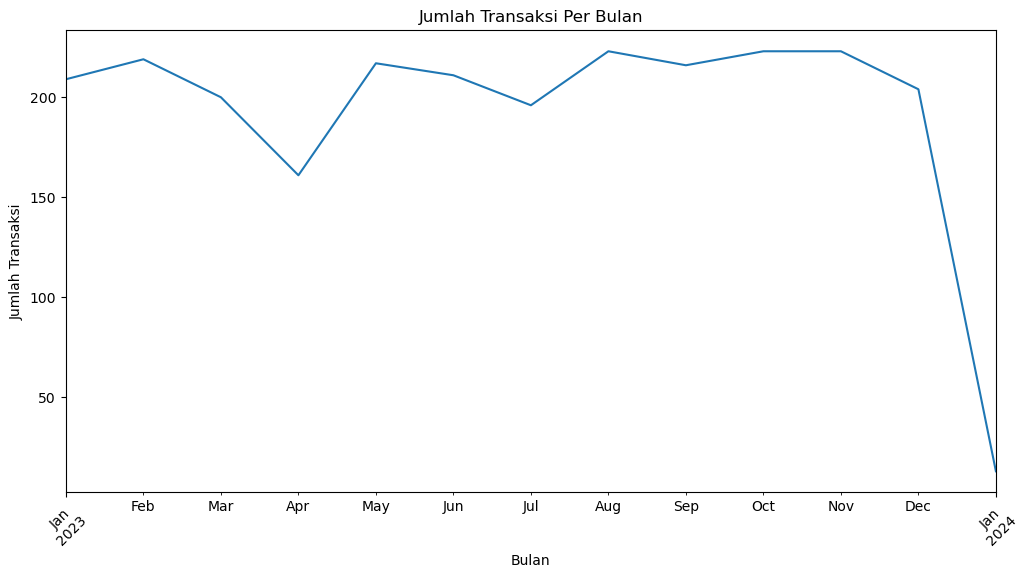

In [13]:
# Plot jumlah transaksi per bulan
df2['Month'] = df2['TransactionDate'].dt.to_period('M')
plt.figure(figsize=(12, 6))
df2.groupby('Month').size().plot(kind='line')
plt.title('Jumlah Transaksi Per Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.show()

#### Violin plot untuk melihat distribusi transaksi berdasarkan saldo akun
- Dari plot, kita bisa melihat bahwa pelanggan dengan pekerjaan sebagai Doctor, Engineer, dan Retired cenderung memiliki transaksi dengan nilai lebih tinggi daripada pelanggan dengan pekerjaan sebagai mahasiswa.

- Ada outlier pada kategori Doctor, di mana ada transaksi dengan jumlah yang sangat tinggi. Hal ini menunjukkan bahwa meskipun sebagian besar transaksi dokter berada di kisaran rendah hingga menengah, ada beberapa transaksi besar yang mempengaruhi distribusi.

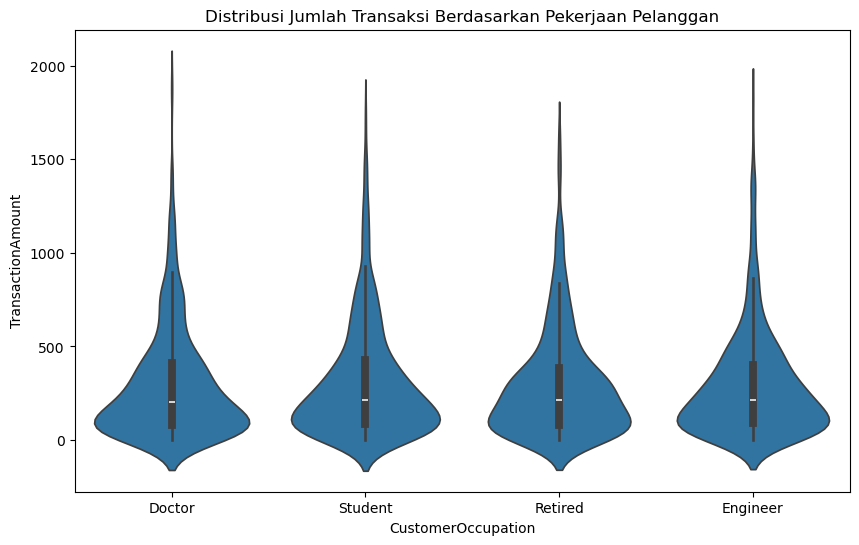

In [14]:
# Violin plot untuk melihat distribusi transaksi berdasarkan saldo akun
plt.figure(figsize=(10, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df2)
plt.title('Distribusi Jumlah Transaksi Berdasarkan Pekerjaan Pelanggan')
plt.show()


#### Melakukan binning dalam pengelompokan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
- pelanggan dengan usia terbanyak berada direntang 26-35 tahun sebanyak 484 pelanggan, tidak jauh berbeda dengan pelanggan usia 18-25 tahun sebanyak 474 pelanggan
- pelanggan dengan rentang usia 36-45 tahun yang paling sedikit yaitu sebanyak 320 pelanggan

In [15]:

age18_25 = df2['CustomerAge'][(df2['CustomerAge'] >= 18) & (df2['CustomerAge'] <= 25)]
age26_35 = df2['CustomerAge'][(df2['CustomerAge'] >= 26) & (df2['CustomerAge'] <= 35)]
age36_45 = df2['CustomerAge'][(df2['CustomerAge'] >= 36) & (df2['CustomerAge'] <= 45)]
age46_55 = df2['CustomerAge'][(df2['CustomerAge'] >= 46) & (df2['CustomerAge'] <= 55)]
age56_65 = df2['CustomerAge'][(df2['CustomerAge'] >= 56) & (df2['CustomerAge'] <= 65)]
age66above = df2['CustomerAge'][df2['CustomerAge'] >= 66]

# Menampilkan jumlah pelanggan di setiap kategori umur
print(f"Jumlah pelanggan usia 18-25: {age18_25.count()}")
print(f"Jumlah pelanggan usia 26-35: {age26_35.count()}")
print(f"Jumlah pelanggan usia 36-45: {age36_45.count()}")
print(f"Jumlah pelanggan usia 46-55: {age46_55.count()}")
print(f"Jumlah pelanggan usia 56-65: {age56_65.count()}")
print(f"Jumlah pelanggan usia 66 ke atas: {age66above.count()}")


Jumlah pelanggan usia 18-25: 474
Jumlah pelanggan usia 26-35: 484
Jumlah pelanggan usia 36-45: 320
Jumlah pelanggan usia 46-55: 430
Jumlah pelanggan usia 56-65: 440
Jumlah pelanggan usia 66 ke atas: 367


### Visualisasi pelanggan per kelompok umur

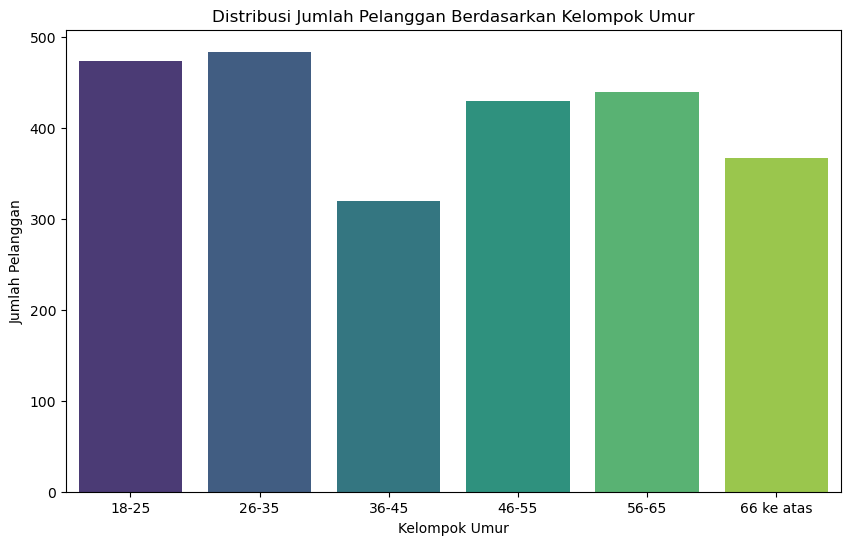

In [16]:
# Membuat data jumlah pelanggan per kelompok umur
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '66 ke atas']
age_counts = [
    age18_25.count(),
    age26_35.count(),
    age36_45.count(),
    age46_55.count(),
    age56_65.count(),
    age66above.count()
]

# Membuat DataFrame untuk plot
df_age = pd.DataFrame({
    'AgeGroup': age_groups,
    'Count': age_counts
})

# Membuat bar plot menggunakan hue untuk warna
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', data=df_age, palette='viridis', hue='AgeGroup')

# Menambahkan label dan judul
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Jumlah Pelanggan Berdasarkan Kelompok Umur')

plt.show()

### Melihat outlier pada variabel numerik
- terdapat outlier pada variabel TransactionAmount dan LoginAttemps

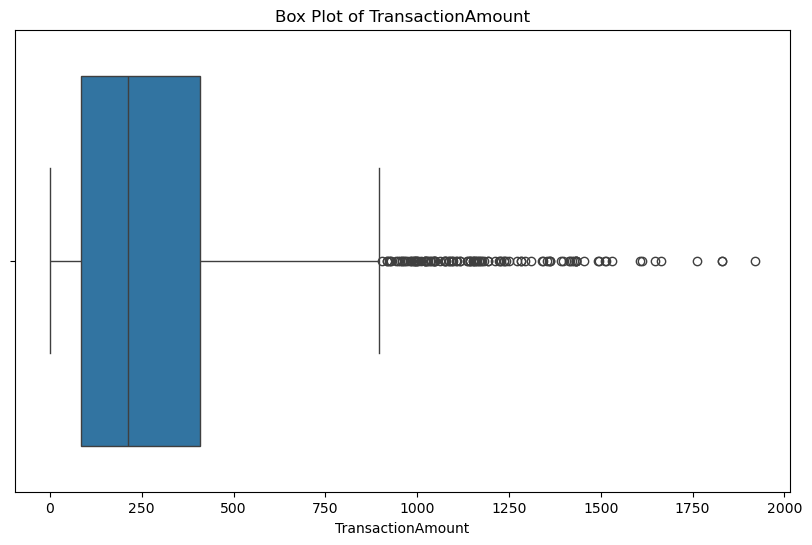

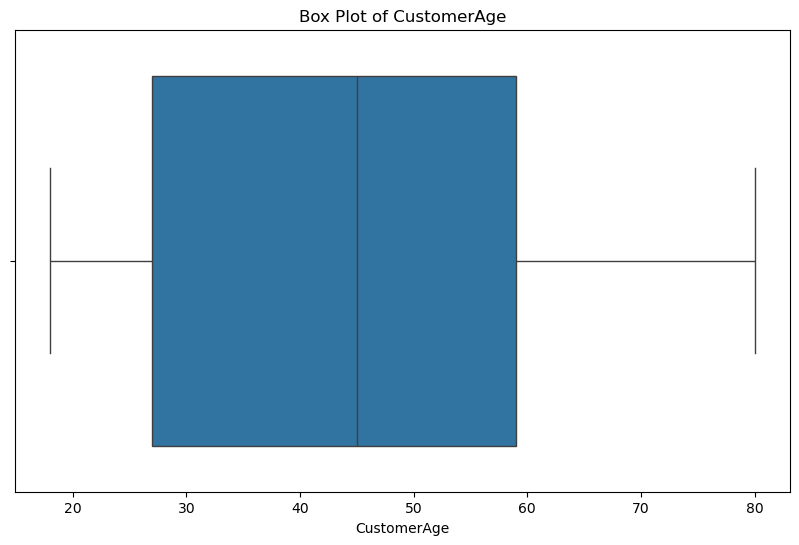

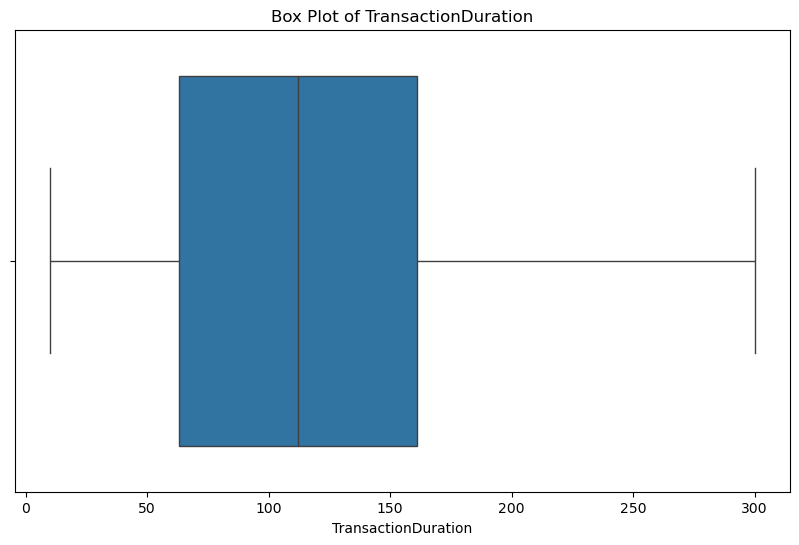

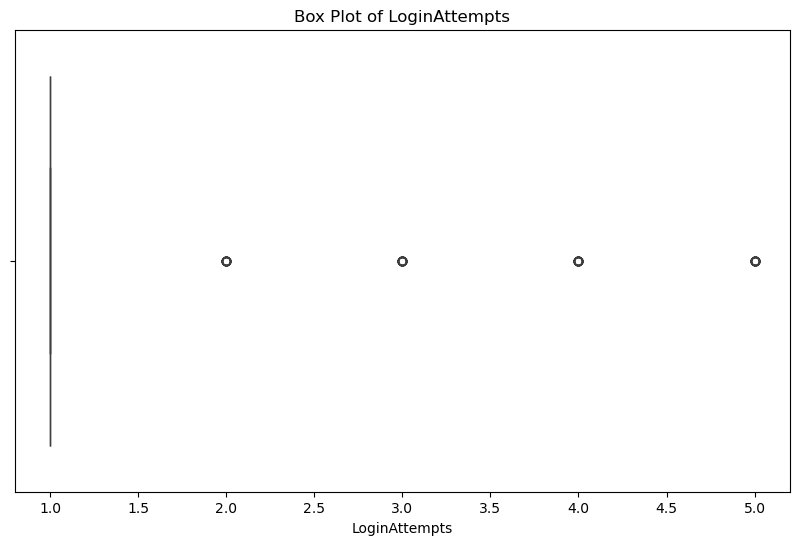

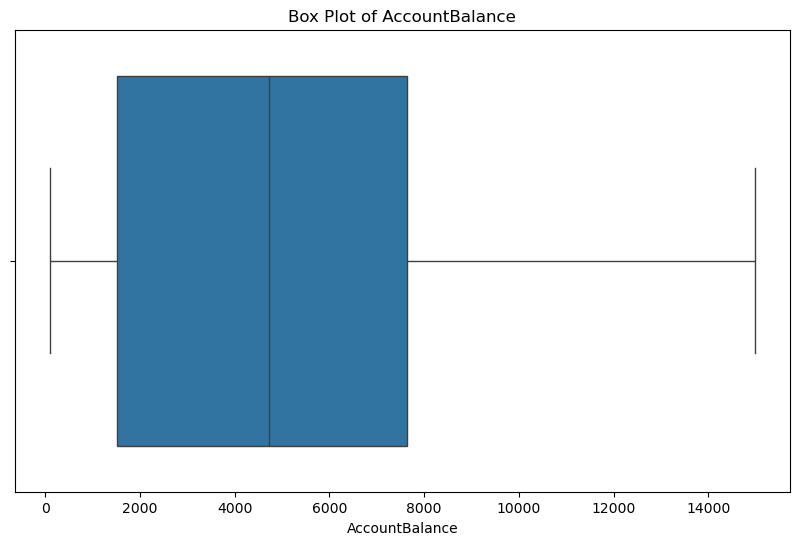

In [17]:

# Loop untuk setiap fitur dalam dataset
for feature in df2.columns:
    # Memastikan hanya kolom numerik yang diproses
    if df2[feature].dtype in ['int64', 'float64']:  
        plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
        sns.boxplot(x=df2[feature])  # Membuat boxplot tanpa 'hue'
        plt.title(f'Box Plot of {feature}')  # Menambahkan judul plot
        plt.show()  # Menampilkan plot


### Penanganan outlier (mengganti nilai outlier dengan batas nilai terdekat)

In [18]:
# Memilih hanya kolom numerik untuk perhitungan IQR
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Menghitung IQR dan menentukan batas bawah dan atas untuk outlier pada kolom numerik
Q1 = df2[numeric_columns].quantile(0.25)
Q3 = df2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk setiap kolom
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menangani outlier: mengganti nilai yang lebih rendah dari batas bawah dengan batas bawah, dan lebih tinggi dari batas atas dengan batas atas
for column in numeric_columns:
    df2[column] = df2[column].apply(
        lambda x: lower_bound[column] if x < lower_bound[column] else
        (upper_bound[column] if x > upper_bound[column] else x)
    )

# Memeriksa hasil setelah penanganan outlier
print(df2.head())


  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0       

### Visualisasi setelah penanganan outlier

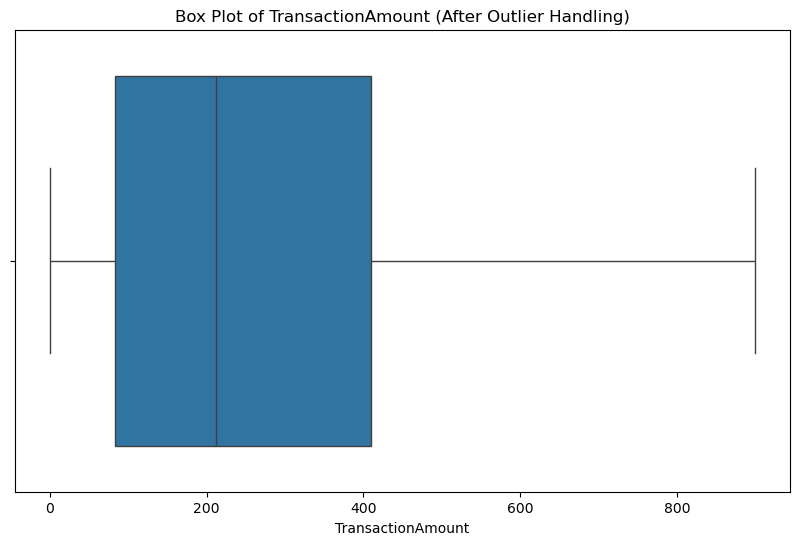

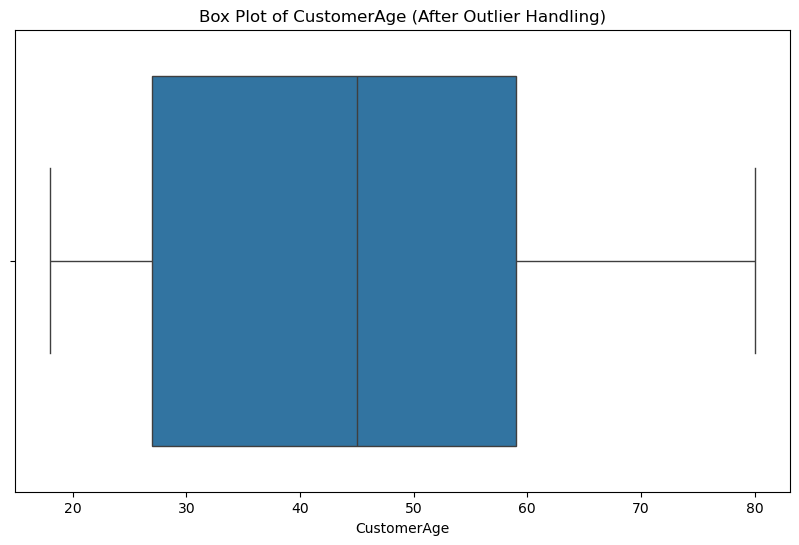

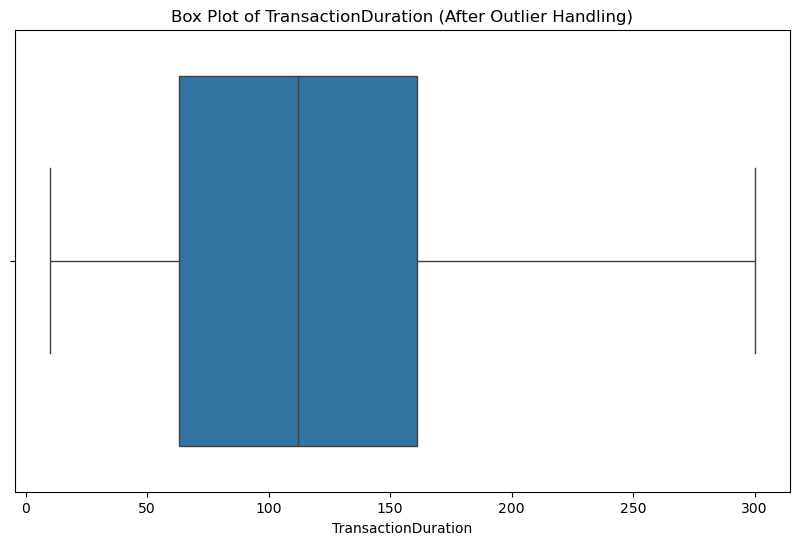

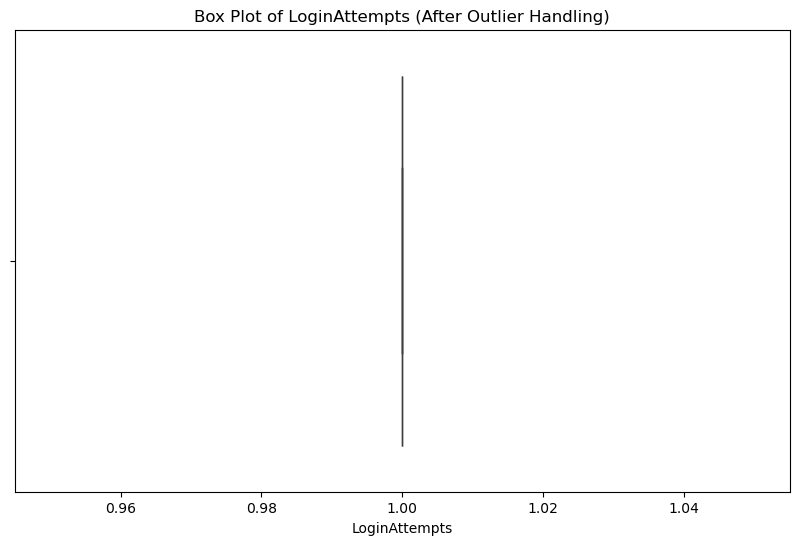

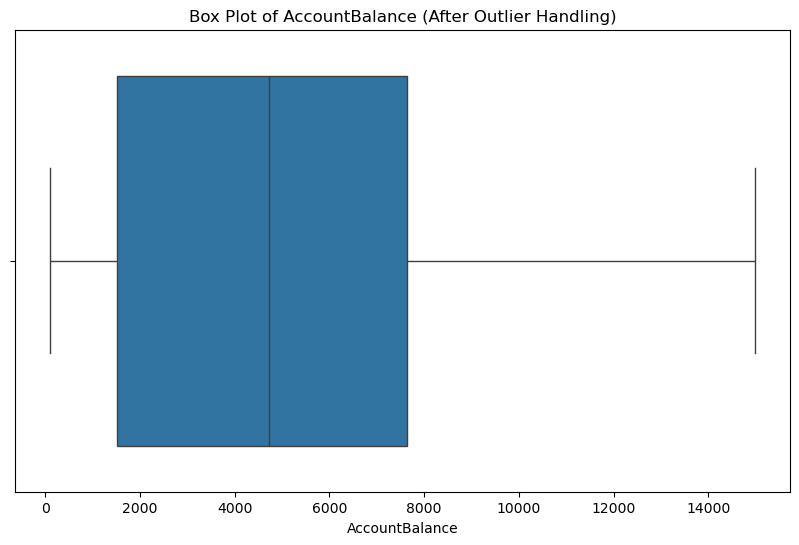

In [19]:
# Membuat boxplot untuk setiap kolom numerik setelah mengatasi outlier
for feature in numeric_columns:
    plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
    sns.boxplot(x=df2[feature])  # Membuat boxplot
    plt.title(f'Box Plot of {feature} (After Outlier Handling)')  # Menambahkan judul
    plt.show()  # Menampilkan plot

### Memilih variabel yang akan digunakan untuk segmentasi pelanggan

In [20]:
# Pilih hanya 6 kolom yang diinginkan
selected_columns = ['TransactionAmount', 'TransactionType', 'CustomerAge', 'AccountBalance', 'Channel', 'CustomerOccupation']
df5 = df2[selected_columns]

# Menampilkan beberapa baris pertama untuk memastikan hanya 6 kolom yang dipilih
print(df5.head())


   TransactionAmount TransactionType  CustomerAge  AccountBalance Channel  \
0              14.09           Debit         70.0         5112.21     ATM   
1             376.24           Debit         68.0        13758.91     ATM   
2             126.29           Debit         19.0         1122.35  Online   
3             184.50           Debit         26.0         8569.06  Online   
4              13.45          Credit         45.0         7429.40  Online   

  CustomerOccupation  
0             Doctor  
1             Doctor  
2            Student  
3            Student  
4            Student  


### Melakukan encoding pada variabel kategorikal menjadi numerik

- kolom transactiotype menggunakan labelencoder()
- kolom chanel dan CustomerOccupation menggnakan onehot encoding

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk 'TransactionType' (karena hanya dua kategori)
le = LabelEncoder()
df5['TransactionType'] = le.fit_transform(df5['TransactionType'])

# One-Hot Encoding untuk 'Channel' dan 'CustomerOccupation'
df5 = pd.get_dummies(df5, columns=['Channel', 'CustomerOccupation'], drop_first=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\2478531946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['TransactionType'] = le.fit_transform(df5['TransactionType'])


In [22]:
print(df5)

      TransactionAmount  TransactionType  CustomerAge  AccountBalance  \
0                 14.09                1         70.0         5112.21   
1                376.24                1         68.0        13758.91   
2                126.29                1         19.0         1122.35   
3                184.50                1         26.0         8569.06   
4                 13.45                0         45.0         7429.40   
...                 ...              ...          ...             ...   
2510             185.97                1         23.0         1776.91   
2511             243.08                0         24.0          131.25   
2513             313.69                1         73.0         7093.68   
2524             232.12                1         37.0         6689.87   
2535             198.62                0         27.0         1196.07   

      Channel_ATM  Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0            True           False          

#### Melakukan visualisasi histogram sebelum scaling feature

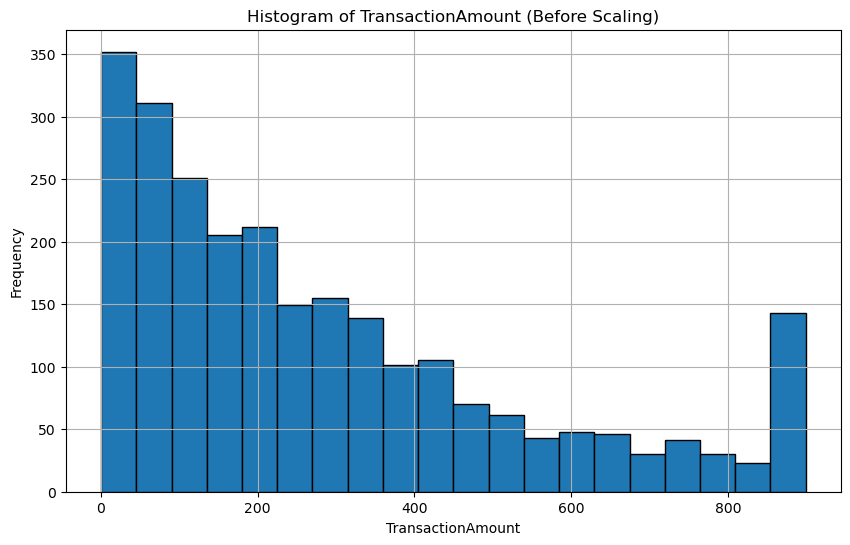

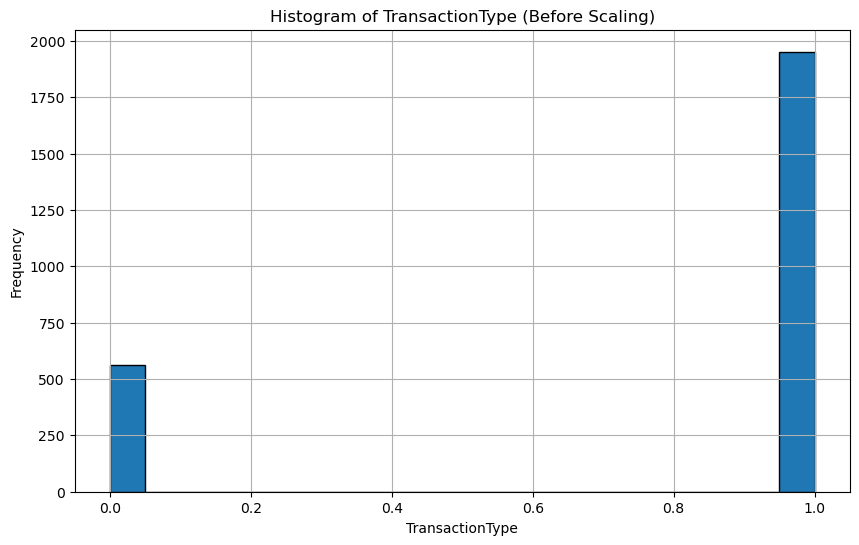

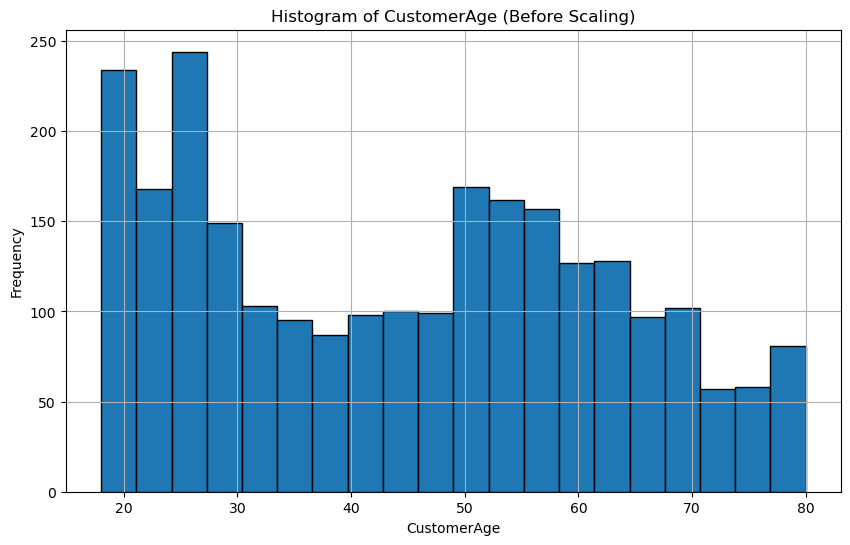

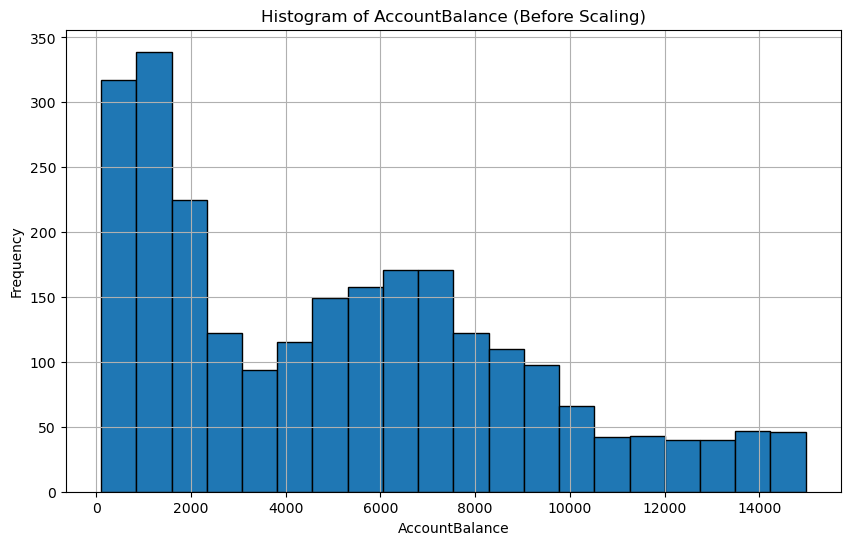

In [23]:
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik untuk histogram
numeric_columns = df5.select_dtypes(include=['float64', 'int64']).columns

# Membuat histogram untuk setiap kolom numerik
for feature in numeric_columns:
    plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
    df5[feature].hist(bins=20, edgecolor='black')  # Membuat histogram
    plt.title(f'Histogram of {feature} (Before Scaling)')  # Menambahkan judul
    plt.xlabel(feature)  # Label sumbu X
    plt.ylabel('Frequency')  # Label sumbu Y
    plt.show()  # Menampilkan plot


#### melakukan scaling feature
- normalisasi pada kolom TransactionAmount dan AccountBalance 
- standarisasi pada kolom customerAge
- melakukan transformasi log pada kolom TransactionAmount dan AccountBalance karena terlalu skewed

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Menangani skewed data dengan MinMaxScaler atau Log Transformation
scaler = MinMaxScaler()  # Bisa diganti dengan StandardScaler() untuk standarisasi
df5[['TransactionAmount', 'AccountBalance']] = scaler.fit_transform(df5[['TransactionAmount', 'AccountBalance']])

# Untuk transformasi log (hanya jika data skewed parah)
df5['TransactionAmount'] = np.log1p(df5['TransactionAmount'])  # Menggunakan log(1+x) untuk menangani nilai 0
df5['AccountBalance'] = np.log1p(df5['AccountBalance'])

# Standarisasi CustomerAge
scaler = StandardScaler()
df5['CustomerAge'] = scaler.fit_transform(df5[['CustomerAge']])

# Menampilkan DataFrame setelah scaling
print(df5)


      TransactionAmount  TransactionType  CustomerAge  AccountBalance  \
0              0.015268                1     1.429523        0.290303   
1              0.349422                1     1.316807        0.651311   
2              0.131202                1    -1.444738        0.066384   
3              0.186440                1    -1.050232        0.450565   
4              0.014566                0     0.020571        0.400514   
...                 ...              ...          ...             ...   
2510           0.187796                1    -1.219306        0.106732   
2511           0.239110                0    -1.162948        0.002015   
2513           0.299116                1     1.598597        0.385279   
2524           0.229464                1    -0.430293        0.366642   
2535           0.199392                0    -0.993874        0.071011   

      Channel_ATM  Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0            True           False          

#### Melakukan visualisasi histogram setelah melakukan scaling feature 


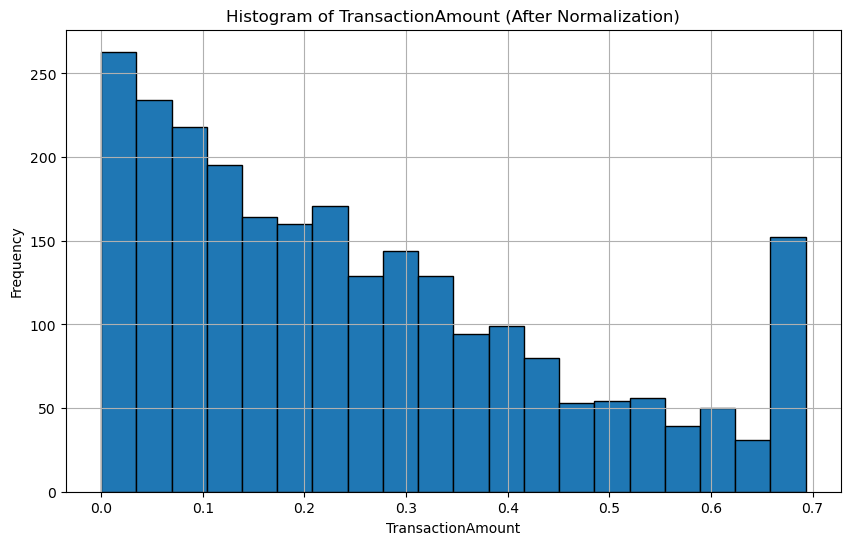

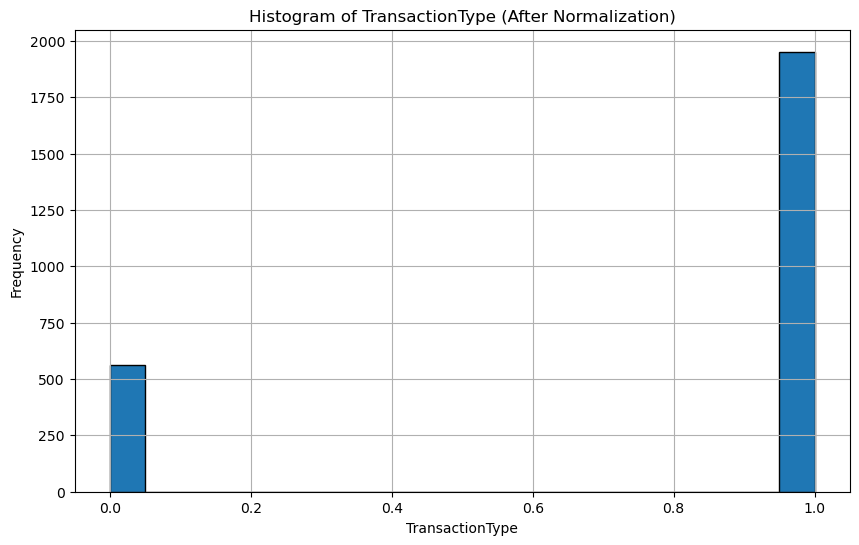

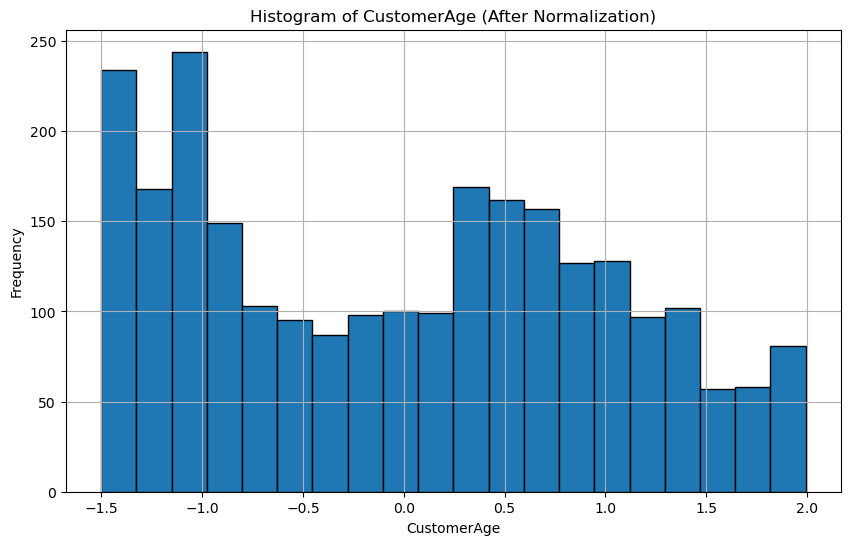

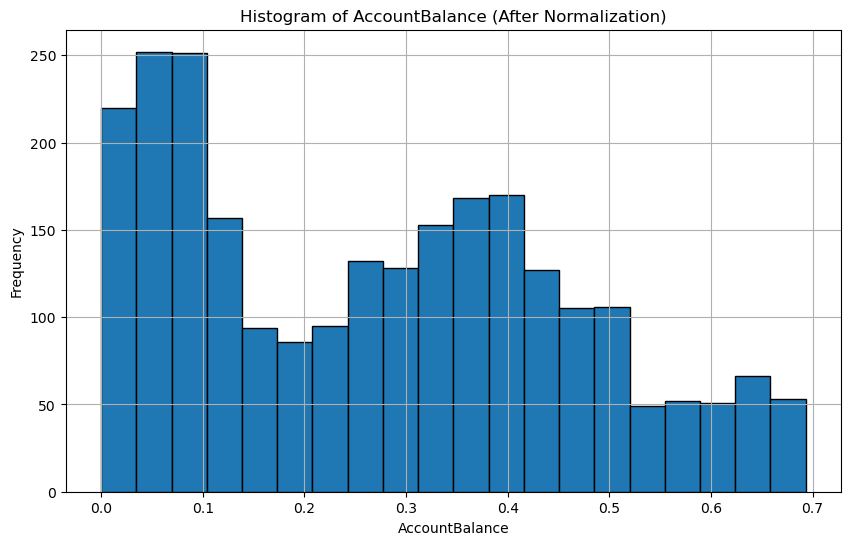

In [25]:
# Membuat histogram untuk setiap kolom numerik setelah normalisasi
numeric_columns = df5.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_columns:
    plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
    df5[feature].hist(bins=20, edgecolor='black')  # Membuat histogram
    plt.title(f'Histogram of {feature} (After Normalization)')  # Menambahkan judul
    plt.xlabel(feature)  # Label sumbu X
    plt.ylabel('Frequency')  # Label sumbu Y
    plt.show()  # Menampilkan plot

#### Menggunakan Elbow methode untuk menentukan jumalh cluster yang optimal

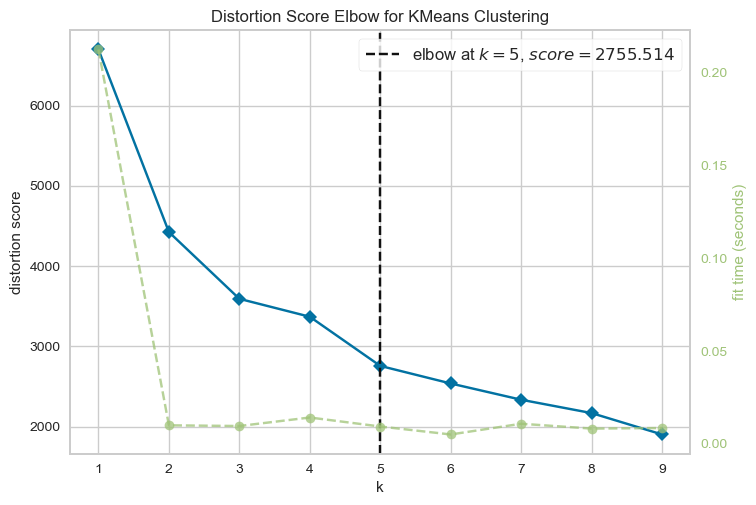

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df5)

# Menampilkan grafik elbow untuk analisis
visualizer.show()


#### Melatih model clustering dengan algoritma K-Means dan menampilkan analisis karakteristik setiap cluster
- analisis karakteristik setiap cluster belum mudah dibaca karena fiturnya belum di inverse

In [27]:
from sklearn.cluster import KMeans
import numpy as np

# Misalkan df4 adalah DataFrame yang sudah dilakukan preprocessing dan normalisasi


# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df5)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan centroid setiap cluster
centroids = kmeans.cluster_centers_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, centroids, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
        
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_values = cluster_data.mean(axis=0)  # Rata-rata untuk setiap fitur dalam cluster
        
        print(f"\nCluster {cluster_id + 1}:")
        for i, feature in enumerate(X.columns):
            print(f"Rata-rata {feature}: {mean_values[i]:.2f}")
        
        print(f"Centroid Cluster {cluster_id + 1}: {centroids[cluster_id]}")
        
# Analisis karakteristik setiap cluster
analyze_clusters(df5, labels, centroids, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.26
Rata-rata TransactionType: 0.76
Rata-rata CustomerAge: 1.11
Rata-rata AccountBalance: 0.31
Rata-rata Channel_ATM: 0.34
Rata-rata Channel_Branch: 0.36
Rata-rata Channel_Online: 0.30
Rata-rata CustomerOccupation_Doctor: 0.29
Rata-rata CustomerOccupation_Engineer: 0.00
Rata-rata CustomerOccupation_Retired: 0.70
Rata-rata CustomerOccupation_Student: 0.01
Centroid Cluster 1: [ 2.56041583e-01  7.62411348e-01  1.11409088e+00  3.13546603e-01
  3.42789598e-01  3.58156028e-01  2.99054374e-01  2.88416076e-01
 -1.94289029e-16  6.97399527e-01  1.41843972e-02]

Cluster 2:
Rata-rata TransactionAmount: 0.26
Rata-rata TransactionType: 0.79
Rata-rata CustomerAge: -1.21
Rata-rata AccountBalance: 0.09
Rata-rata Channel_ATM: 0.33
Rata-rata Channel_Branch: 0.35
Rata-rata Channel_Online: 0.32
Rata-rata CustomerOccupation_Doctor: 0.00
Rata-rata CustomerOccupation_Engineer: 0.00
Rata-rata CustomerOccupation_Retired: 0.00
Rata-

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\282372831.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Rata-rata {feature}: {mean_values[i]:.2f}")


#### Melakukan visualisasi setiap centroid pada setiap cluster

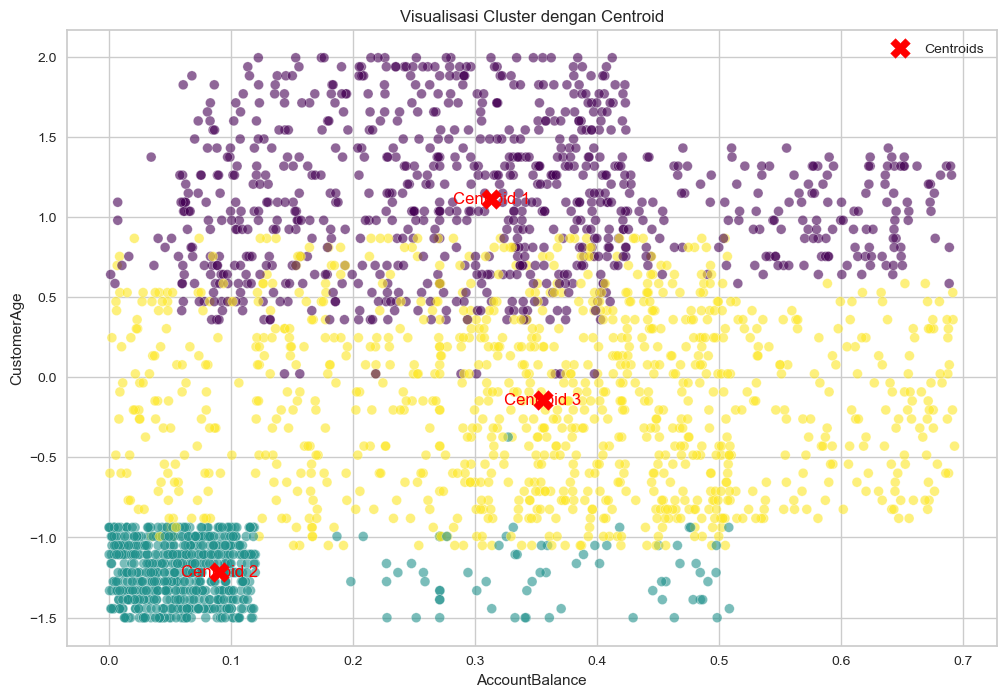

Nilai Centroids:
Centroid 1: AccountBalance = 0.31, CustomerAge = 1.11
Centroid 2: AccountBalance = 0.09, CustomerAge = -1.21
Centroid 3: AccountBalance = 0.36, CustomerAge = -0.14


In [28]:
import matplotlib.pyplot as plt

# Asumsi: model KMeans sudah dilatih dengan nama 'kmeans'
# Mendapatkan centroid setiap cluster
centroids = kmeans.cluster_centers_

# Mendapatkan label cluster
labels = kmeans.labels_

# Visualisasi cluster dan centroid
plt.figure(figsize=(12, 8))

# Plot data dengan warna berdasarkan cluster
plt.scatter(df5.iloc[:, 3], df5.iloc[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid (dalam dimensi 2D)
plt.scatter(centroids[:, 3], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[3], centroid[2], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel(df5.columns[3])  # Label X axis sesuai dengan nama fitur pertama
plt.ylabel(df5.columns[2])  # Label Y axis sesuai dengan nama fitur kedua
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {df5.columns[3]} = {centroid[3]:.2f}, {df5.columns[2]} = {centroid[2]:.2f}")


### Melakukan evaluasi model
- Silhouette Score: 0.2696
- Inertia (Within-Cluster Sum of Squares): 3591.53
- Davies-Bouldin Index: 1.5175

Silhouette Score: 0.2696
Inertia (Within-Cluster Sum of Squares): 3591.53
Davies-Bouldin Index: 1.5175


c:\Users\HP\anaconda3\envs\Latihan1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\HP\anaconda3\envs\Latihan1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


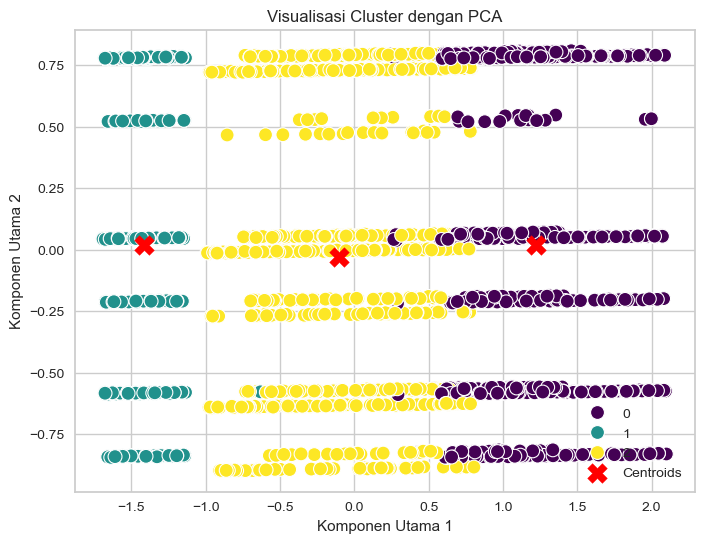

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Silhouette Score (sudah dilakukan sebelumnya)
silhouette_avg = silhouette_score(df5, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Inertia (sudah tersedia di objek KMeans)
inertia = kmeans.inertia_
print(f"Inertia (Within-Cluster Sum of Squares): {inertia:.2f}")

# Davies-Bouldin Index
db_score = davies_bouldin_score(df5, labels)
print(f"Davies-Bouldin Index: {db_score:.4f}")

# Visualisasi cluster menggunakan PCA (reduksi ke 2 dimensi)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df5)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import joblib

#### Menyimpan model dan transform dengan .h5

In [32]:
# --- Simpan Model dan Transformer dengan .h5 ---
joblib.dump(kmeans, 'model_clustering.h5')  # Model K-Means
joblib.dump(pca, 'PCA_model_clustering.h5')  # Model PCA
print("Model disimpan ke 'model_clustering.h5', 'model_clustering_pca.h5', dan 'PCA_model_clustering.h5'")

Model disimpan ke 'model_clustering.h5', 'model_clustering_pca.h5', dan 'PCA_model_clustering.h5'


In [33]:
df_inverse = df5.copy()

#### Inverse transform pada 'TransactionType' untuk mengembalikannya ke kategori asli
#### Mengembalikan hasil One-Hot Encoding untuk 'Channel'
#### Menentukan kolom hasil One-Hot Encoding untuk 'Channel' dan 'CustomerOccupation'

In [34]:
# Inverse transform pada 'TransactionType' untuk mengembalikannya ke kategori asli
df_inverse['TransactionType'] = le.inverse_transform(df_inverse['TransactionType'])

def inverse_one_hot_encoding(df, channel_columns, occupation_columns):
    # Mengembalikan hasil One-Hot Encoding untuk 'Channel'
    df['Channel'] = df[channel_columns].idxmax(axis=1).str.replace('Channel_', '')
    
    # Mengembalikan hasil One-Hot Encoding untuk 'CustomerOccupation'
    df['CustomerOccupation'] = df[occupation_columns].idxmax(axis=1).str.replace('CustomerOccupation_', '')
    
    return df

# Menentukan kolom hasil One-Hot Encoding untuk 'Channel' dan 'CustomerOccupation'
df_inverse = inverse_one_hot_encoding(df_inverse, 
                                ['Channel_ATM', 'Channel_Branch', 'Channel_Online'], 
                                ['CustomerOccupation_Doctor', 'CustomerOccupation_Student', 'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'  ])

# Menampilkan hasil
print(df_inverse[['TransactionType', 'Channel', 'CustomerOccupation']].head())


  TransactionType Channel CustomerOccupation
0           Debit     ATM             Doctor
1           Debit     ATM             Doctor
2           Debit  Online            Student
3           Debit  Online            Student
4          Credit  Online            Student


In [35]:
df_inverse.head()

,TransactionAmount,TransactionType,CustomerAge,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Channel,CustomerOccupation
0,0.015268,Debit,1.429523,0.290303,True,False,False,True,False,False,False,ATM,Doctor
1,0.349422,Debit,1.316807,0.651311,True,False,False,True,False,False,False,ATM,Doctor
2,0.131202,Debit,-1.444738,0.066384,False,False,True,False,False,False,True,Online,Student
3,0.186440,Debit,-1.050232,0.450565,False,False,True,False,False,False,True,Online,Student
4,0.014566,Credit,0.020571,0.400514,False,False,True,False,False,False,True,Online,Student


#### Menghapus kolom-kolom One-Hot Encoding yang sudah tidak diperlukan

In [36]:
# Menghapus kolom-kolom One-Hot Encoding yang sudah tidak diperlukan
df_inverse.drop(columns=['Channel_ATM', 'Channel_Branch', 'Channel_Online', 
                  'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer', 
                  'CustomerOccupation_Retired', 'CustomerOccupation_Student'], inplace=True)

# Menampilkan DataFrame yang telah dibersihkan
print(df_inverse[['TransactionType', 'Channel', 'CustomerOccupation']].head())

  TransactionType Channel CustomerOccupation
0           Debit     ATM             Doctor
1           Debit     ATM             Doctor
2           Debit  Online            Student
3           Debit  Online            Student
4          Credit  Online            Student


In [37]:
df_inverse.head()

,TransactionAmount,TransactionType,CustomerAge,AccountBalance,Channel,CustomerOccupation
0,0.015268,Debit,1.429523,0.290303,ATM,Doctor
1,0.349422,Debit,1.316807,0.651311,ATM,Doctor
2,0.131202,Debit,-1.444738,0.066384,Online,Student
3,0.186440,Debit,-1.050232,0.450565,Online,Student
4,0.014566,Credit,0.020571,0.400514,Online,Student


#### menginvers fitur yang telah di scaling

In [38]:
# Inverse MinMaxScaler untuk mengembalikan ke skala asli
df_inverse[['TransactionAmount', 'AccountBalance']] = scaler.inverse_transform(df_inverse[['TransactionAmount', 'AccountBalance']])

# Inverse StandardScaler untuk mengembalikan ke nilai asli
df_inverse['CustomerAge'] = scaler.inverse_transform(df_inverse[['CustomerAge']])

# Menampilkan DataFrame setelah inverse transformasi
print(df_inverse[['TransactionAmount', 'AccountBalance', 'CustomerAge']].head())

   TransactionAmount  AccountBalance  CustomerAge
0          44.905894       49.786028         70.0
1          50.835033       56.191659         68.0
2          46.963004       45.812893         19.0
3          47.943126       52.629669         26.0
4          44.893449       51.741580         45.0


#### Melakukan analisis karakteristik setiap cluster dengan fitur yang telahh di invers 

In [39]:
# --- Analisis pada Data Inverse ---
def analyze_clusters_inverse(df5, labels, k, features):
    print("Analisis Karakteristik Setiap Cluster (Data Asli):")
    for cluster_id in range(k):
        cluster_data = df5[labels == cluster_id]
        print(f"\nCluster {cluster_id + 1}:")
        for feature in features:
            if feature in cluster_data.columns:
                print(f"Rata-rata {feature}: {cluster_data[feature].mean():.2f}")
        if 'TransactionType' in cluster_data.columns:
            print(f"Distribusi TransactionType:\n{cluster_data['TransactionType'].value_counts()}")
        if 'Channel' in cluster_data.columns:
            print(f"Distribusi Channel:\n{cluster_data['Channel'].value_counts()}")
        if 'CustomerOccupation' in cluster_data.columns:
            print(f"Distribusi CustomerOccupation:\n{cluster_data['CustomerOccupation'].value_counts()}")

# Panggil fungsi dengan df_inverse (bukan df5, karena ini data inverse transform)
analyze_clusters_inverse(df_inverse, labels, k=3, features=['TransactionAmount', 'AccountBalance', 'CustomerAge'])

Analisis Karakteristik Setiap Cluster (Data Asli):

Cluster 1:
Rata-rata TransactionAmount: 49.18
Rata-rata AccountBalance: 50.19
Rata-rata CustomerAge: 64.41
Distribusi TransactionType:
TransactionType
Debit     644
Credit    201
Name: count, dtype: int64
Distribusi Channel:
Channel
Branch    302
ATM       290
Online    253
Name: count, dtype: int64
Distribusi CustomerOccupation:
CustomerOccupation
Retired    590
Doctor     243
Student     12
Name: count, dtype: int64

Cluster 2:
Rata-rata TransactionAmount: 49.32
Rata-rata AccountBalance: 46.24
Rata-rata CustomerAge: 23.09
Distribusi TransactionType:
TransactionType
Debit     518
Credit    139
Name: count, dtype: int64
Distribusi Channel:
Channel
Branch    227
ATM       220
Online    210
Name: count, dtype: int64
Distribusi CustomerOccupation:
CustomerOccupation
Student    657
Name: count, dtype: int64

Cluster 3:
Rata-rata TransactionAmount: 48.99
Rata-rata AccountBalance: 50.95
Rata-rata CustomerAge: 42.11
Distribusi TransactionTyp

#### Mengekspor hasil

In [40]:
# --- Ekspor Hasil ---
df5['Target'] = labels
df5.to_csv('data_clustering_preprocessed.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)
print("Data disimpan ke 'data_clustering_preprocessed.csv' dan 'data_clustering_inverse.csv'")

Data disimpan ke 'data_clustering_preprocessed.csv' dan 'data_clustering_inverse.csv'


#### Menambahkan fitur target ke dalam data frame

In [41]:
df_inverse['Target'] = labels
df_inverse.to_csv('data_clustering_inverseWithTarget.csv', index=False)